# Generation of symmetric zero-sum games

Given a randomly generated symmetric payoff matrix, can values be adjusted to yield a desired Nash equilibrium (e.g. uniform in all actions)?  Specifically, suppose each action $a$ has a fixed reward $r_a$ whenever it beats the opponent's action.  Therefore, the payoff $p(a, b) \in \{r_a, 0, -r_b\}$ depending whether $a$ defeats, ties, or is defeated by $b$.

In [44]:
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt

In [45]:
# First, generate the sign of the payoff matrix.  No ties except for identical actions.
n = 10 # number of actions
p_sign = rand(n, n)
p_sign = p_sign - p_sign.T
p_sign = np.sign(p_sign)
p_sign

array([[ 0., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.],
       [ 1.,  0.,  1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  0., -1.,  1., -1.,  1., -1.,  1., -1.],
       [-1., -1.,  1.,  0., -1., -1., -1.,  1., -1.,  1.],
       [-1.,  1., -1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1., -1.,  0., -1., -1., -1.,  1.],
       [ 1., -1., -1.,  1., -1.,  1.,  0., -1.,  1.,  1.],
       [-1., -1.,  1., -1., -1.,  1.,  1.,  0.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1., -1.,  0., -1.],
       [ 1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  0.]])

In [46]:
# desired nash equilibrium
target_p = np.ones(n)/n
# uniform rewards to begin
rewards = np.ones(n)
rewards, target_p

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [47]:
# function to form payoff matrix from signs and rewards
def form_payoff(p_sign, rewards):
    payoff = np.dot(np.diag(rewards), (p_sign==1))
    payoff = payoff - payoff.T
    return payoff

In [48]:
# optimization parameters
learning_rate = 0.1
n_iterations = 1000

In [49]:
# determine values of strategies
# decrease the rewards of high-value strategies and increase the rewards of low-value strategies
all_rewards = []
all_values = []

for iter_no in range(n_iterations):
    all_rewards.append(rewards)
    payoff = form_payoff(p_sign, rewards)
    values = np.dot(payoff, target_p)
    all_values.append(values)
    rewards = rewards - learning_rate * values
    
all_rewards = np.array(all_rewards)
all_values = np.array(all_values)

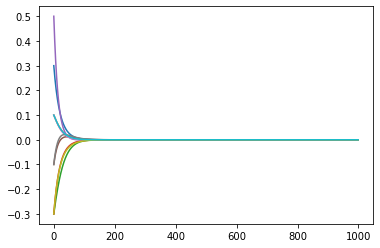

In [50]:
plt.plot(all_values)

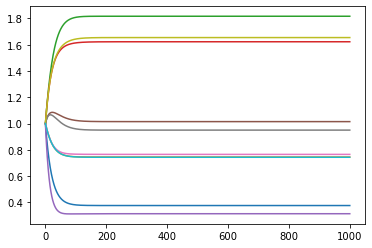

In [51]:
plt.plot(all_rewards)